In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./build/output.txt", delimiter=" ", header=None)
data.describe()

,0,1
count,1.001640e+06,1.001640e+06
mean,1.785329e-08,-inf
std,1.807114e-08,NaN
min,0.000000e+00,-inf
25%,4.656890e-09,-5.331900e+01
50%,1.210790e-08,-4.916930e+01
75%,2.421590e-08,-4.615900e+01
max,2.840710e-07,-3.546570e+01


In [3]:
time_elapsed = 10
number_samples = len(data[1])
time_per_sample = time_elapsed / number_samples
time_per_sample # 2 microseconds -> average every 10 values together to get sampling rate of every 20 us or just pick every 10th value


9.98362685196278e-06

In [4]:
import math

all_rssi_values = data[1][1025:]
all_power_values = data[0][1025:]
valid_rssi_values = [value for value in all_rssi_values if not (math.isnan(value) or math.isinf(value))]

required_rssi_values = []
for i in range(len(valid_rssi_values)):
    if i % 12 == 0:
        required_rssi_values.append(valid_rssi_values[i])

valid_rssi_values = required_rssi_values
len(valid_rssi_values)

81934

In [5]:
df_valid_rssi = pd.DataFrame(valid_rssi_values)
df_valid_rssi[0].to_csv("./build/values_sampled.txt")
df_valid_rssi.head()

,0
0,-50.7663
1,-44.2881
2,-42.4554
3,-57.2984
4,-50.3087


In [6]:
np.mean(valid_rssi_values)

-49.66186465081651

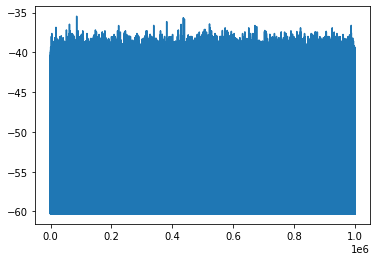

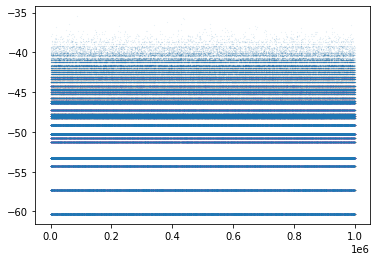

In [7]:
plt.plot(range(len(all_rssi_values)), all_rssi_values)
plt.show()

plt.scatter(range(len(all_rssi_values)), all_rssi_values, s=0.001)
plt.show()

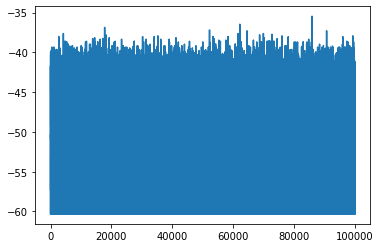

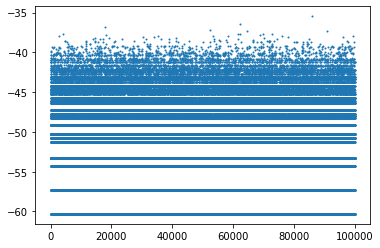

In [8]:
number_data_points_to_plot = 100000
plt.plot(range(number_data_points_to_plot), all_rssi_values[:number_data_points_to_plot])
plt.show()

plt.scatter(range(number_data_points_to_plot), all_rssi_values[:number_data_points_to_plot], s=1)
plt.show()

In [21]:

# no_switch = [-85.432, -84.630, -78.259]
# switch = [-92.185, -91.242, -90.076]

no_switch = [-85.432 + 100, -84.630 + 100, -78.259 + 100]
switch = [-92.185 + 100, -91.242 + 100, -90.076 + 100]

In [22]:
# no_switch = [-85.790 + 100, -84.56 + 100, -79.324 + 100]
# switch = [-94.065 + 100, -94.074 + 100, -94.064 + 100]

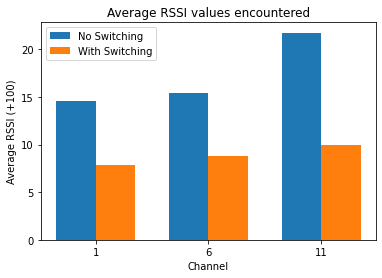

In [27]:
# Plotting the total traffic state proportions
N = 3
width = 0.35

ind = np.arange(N)
ind1 = [x + width for x in ind]

plt.bar(ind, no_switch, width, label='No Switching')
plt.bar(ind1, switch, width, label='With Switching')


channels = [1, 6, 11]

plt.xlabel('Channel')
plt.xticks([r +  0.5 * width for r in range(N)], [x for x in channels])
plt.ylabel('Average RSSI (+100)')
plt.legend()
plt.title("Average RSSI values encountered")

plt.show()